<a href="https://colab.research.google.com/github/Saptasindhu07/Linear-Regression/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [67]:
from google.colab import files
uploaded = files.upload()

Saving iq_marks_highly_polynomial_100.csv to iq_marks_highly_polynomial_100 (1).csv


In [68]:
data=pd.read_csv('iq_marks_highly_polynomial_100.csv')
data.head()

,IQ,Marks
0,97.45,62.34
1,112.78,82.56
2,86.23,50.12
3,105.67,75.89
4,93.12,58.45


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      1041 non-null   float64
 1   Marks   1040 non-null   float64
dtypes: float64(2)
memory usage: 16.4 KB


In [70]:
data['IQ']=pd.to_numeric(data['IQ'],errors='coerce')


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      1041 non-null   float64
 1   Marks   1040 non-null   float64
dtypes: float64(2)
memory usage: 16.4 KB


In [72]:
data.corr()

,IQ,Marks
IQ,1.000000,0.987173
Marks,0.987173,1.000000


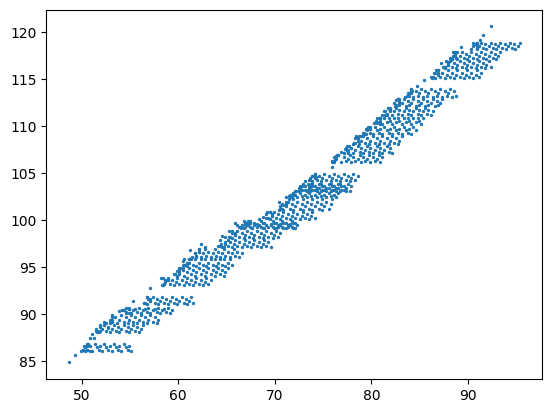

In [73]:
plt.scatter(x=data['Marks'],y=data['IQ'], s=2)

In [74]:
data.drop(data.index[1040], axis=0,inplace=True)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      1040 non-null   float64
 1   Marks   1040 non-null   float64
dtypes: float64(2)
memory usage: 16.4 KB


In [76]:
X=data[['IQ']]
X

,IQ
0,97.45
1,112.78
2,86.23
3,105.67
4,93.12
...,...
1035,98.67
1036,89.45
1037,113.23
1038,102.89


In [77]:
y=data['Marks']
y

,Marks
0,62.34
1,82.56
2,50.12
3,75.89
4,58.45
...,...
1035,70.56
1036,57.89
1037,88.78
1038,76.56


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [95]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.fit_transform(X_test)
X_test


array([[ 0.70598407],
       [-1.80311366],
       [ 1.20230171],
       [ 0.14547754],
       [ 1.29170766],
       [ 0.9088668 ],
       [ 0.13286901],
       [-1.00075257],
       [ 0.51456364],
       [-1.43402756],
       [ 0.24749202],
       [ 0.03085453],
       [-0.05855142],
       [-1.31940455],
       [-0.19839149],
       [-0.78411508],
       [-0.58123235],
       [-0.09637701],
       [-1.52343351],
       [ 0.06868012],
       [ 0.31053468],
       [ 1.20230171],
       [ 0.31053468],
       [-1.20478153],
       [ 1.22751877],
       [ 1.10028723],
       [-1.75267953],
       [ 1.57138781],
       [-0.61905795],
       [ 0.19591167],
       [-1.15434741],
       [-0.05855142],
       [ 0.9088668 ],
       [-0.92510139],
       [-0.09637701],
       [ 0.88364974],
       [ 0.83321561],
       [ 0.98566422],
       [-1.15434741],
       [ 1.82585089],
       [-0.00811729],
       [-1.43402756],
       [ 0.59136106],
       [-0.23736332],
       [-1.30679601],
       [-0

In [96]:
X_train.shape

(832, 1)

In [97]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
data['IQ']=Scaler.transform(data[['IQ']])
data

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,IQ,Marks
0,-11.755344,62.34
1,-11.563467,82.56
2,-11.895778,50.12
3,-11.652459,75.89
4,-11.809540,58.45
...,...,...
1035,-11.740074,70.56
1036,-11.855475,57.89
1037,-11.557835,88.78
1038,-11.687255,76.56


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


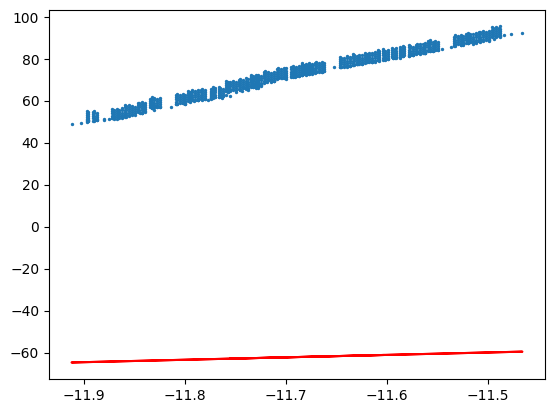

In [99]:
plt.scatter(x=data['IQ'],y=data['Marks'], s=2)
plt.plot(data['IQ'],lr.predict(data[['IQ']]),color='red')

**Does the Line fit very bad in the regression?? No! But can it fit better? Maybe yes. Without overfitting ? Maybe yes.**

In [100]:
r2_score(y_test,lr.predict(X_test))

0.9603453192011204

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


In [104]:
X_train_poly

array([[ 1.00000000e+00,  1.44293372e+00,  2.08205771e+00],
       [ 1.00000000e+00,  1.11534502e+00,  1.24399451e+00],
       [ 1.00000000e+00, -2.92194419e-01,  8.53775783e-02],
       ...,
       [ 1.00000000e+00, -6.31794702e-01,  3.99164545e-01],
       [ 1.00000000e+00, -2.57556114e-02,  6.63351517e-04],
       [ 1.00000000e+00,  6.05398612e-01,  3.66507480e-01]])

In [108]:
lr_poly=LinearRegression()
lr_poly.fit(X_train_poly,y_train)
y_pred_poly= lr_poly.predict(X_test_poly)

In [109]:
r2_score(y_test,y_pred_poly)

0.9622511990958205

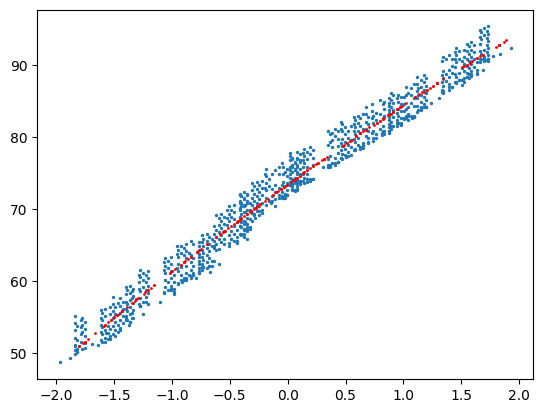

In [115]:
plt.scatter(x=X_train,y=y_train, s=2)
plt.scatter(X_test,lr_poly.predict(X_test_poly),color='red',s=1)

****

What happens if we keep increasing the degree?


In [120]:
def PolynomialRegressionPlotAndR2(degree,X_train,X_test,):
  poly=PolynomialFeatures(degree=degree,include_bias=True)
  X_train_poly=poly.fit_transform(X_train)
  X_test_poly=poly.transform(X_test)
  lr_poly=LinearRegression()
  lr_poly.fit(X_train_poly,y_train)
  y_pred_poly= lr_poly.predict(X_test_poly)
  print(r2_score(y_test,y_pred_poly))
  plt.scatter(x=X_train,y=y_train, s=2)
  plt.scatter(X_test,lr_poly.predict(X_test_poly),color='red',s=1)
  plt.show()



0.9622511990958205


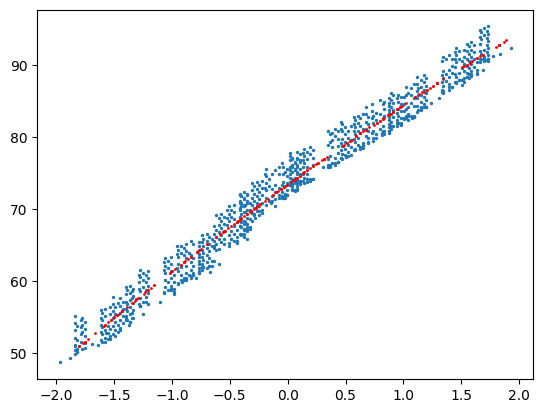

In [121]:
PolynomialRegressionPlotAndR2(2,X_train,X_test)

0.9622825610453105


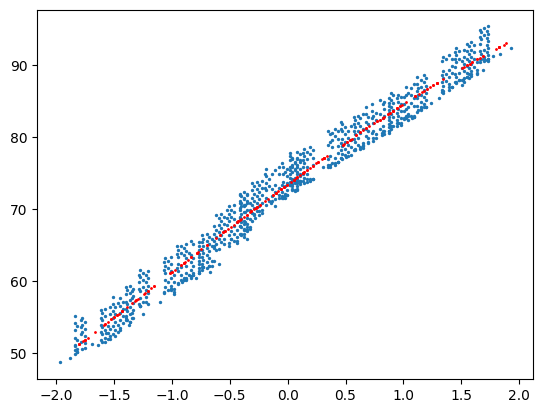

In [122]:
PolynomialRegressionPlotAndR2(3,X_train,X_test)

0.9623438592311625


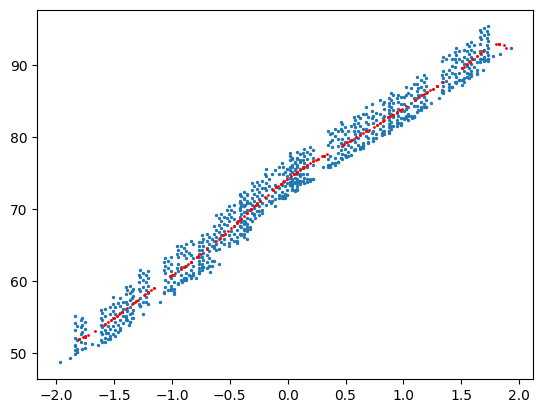

In [123]:
PolynomialRegressionPlotAndR2(10,X_train,X_test)

0.9613560299513719


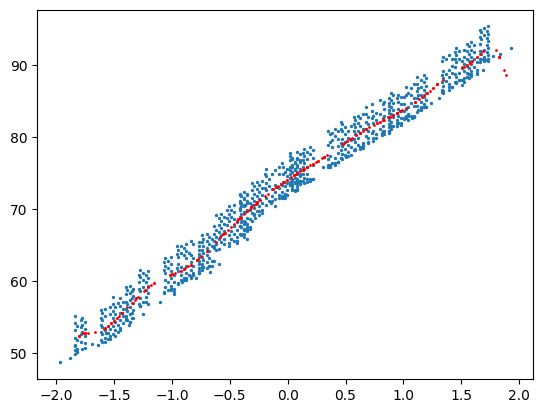

In [124]:
PolynomialRegressionPlotAndR2(20,X_train,X_test)

0.9622793016855093


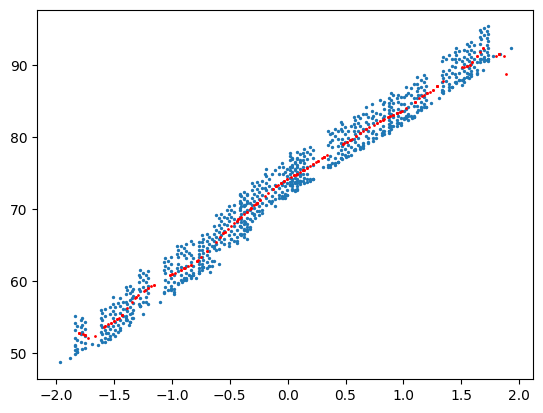

In [126]:
PolynomialRegressionPlotAndR2(30,X_train,X_test)

**See how the extent of overfitting increases as we keep increasing the degree!!**